# Handling Multicollinearity
- pearson correlation
-  Variance Inflation Factor (VIF)

In [1]:
from datetime import datetime
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import platform
from scipy.stats import spearmanr
import seaborn as sns
import sys

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

date_format = "%Y-%m-%d"

In [2]:
my_os = platform.system()
print("OS in my system: ",my_os)

if my_os == "Windows":
    path = str(pathlib.Path().absolute()) + '\\'
    slash = '\\'
else:
    path = str(pathlib.Path().absolute()) + '/'
    slash = '/'

artif_path = path + 'data_artifacts' + slash

OS in my system:  Windows


## Load data

In [3]:
# eikon spx
data_set = pd.read_csv(artif_path + 'data_set_e_spx_2-formatted.csv', index_col=0)
data_set['fam_target_hor'] = data_set['fam_target_hor'].astype("category")
data_set['fam_target_ori'] = data_set['fam_target_ori'].astype("category")

data_set_indexed = data_set.set_index(['ric', 'year'])
data_set_indexed.head()

mapping = pd.read_excel(path.replace('3_data_pre-processing', '1_data_collection') + 'possible_features.xlsx', sheet_name='mapping')
data_set.head()

,ric,year,symbol,tau_cop_3y,tau_cop_5y,rot_target_ori,tau_target_ori,par_target_ori,year_hor,tau_target_hor,rot_target_hor,par_target_hor,debt,tass,rtass,tlia,tsheq,comeq,comsi,noa,wc,ndebt,capex,ncfo,levfcf,nincam,gp,trev,ebit,roe,roce,rnoa,ebitmarg,shouts,mc,ptbvps,oips,cfps,ros_c,prof_c,finlev_c,inc_days,ipo_days,naics_1,naics_2,naics_3,naics_4,naics_5,naics_6,naics_7,naics_8,naics_9,naics_10,naics_11,naics_12,naics_13,naics_14,naics_15,naics_16,naics_17,naics_18,naics_19,fam_target_hor_clayton,fam_target_hor_frank,fam_target_hor_gaussian,fam_target_hor_gumbel,fam_target_hor_indep,fam_target_hor_joe,fam_target_hor_student,fam_target_ori_clayton,fam_target_ori_frank,fam_target_ori_gaussian,fam_target_ori_gumbel,fam_target_ori_indep,fam_target_ori_joe,fam_target_ori_student,fam_target_hor,fam_target_ori
3,A.ITC,2004,A,0.485946,0.425203,0,0.462612,[[5.09499262]],2005,0.371968,0,[[3.78686423]],0.724119,0.934727,-0.322801,0.034067,0.627112,0.667573,1.636099,0.057001,2.209911,-3.080019,0.455358,0.377481,0.557085,0.373503,0.872499,1.050527,-0.209038,-0.371659,-0.617933,-0.347687,-0.538646,1.750710,1.375897,0.207180,-0.428181,-0.337362,-0.417621,-0.093411,-0.366484,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,frank,frank
4,A.ITC,2005,A,0.451243,0.457525,0,0.371968,[[3.78686423]],2006,0.384465,0,[[0.56787014]],-2.241748,0.904411,-0.125101,-0.058830,0.769603,0.815436,1.675887,-0.056930,1.888018,-6.019859,0.675604,0.600123,0.767432,0.308105,0.972029,1.067135,0.062047,-0.222672,-0.369045,-0.020705,-0.396042,1.757078,1.518272,0.404743,-0.353201,-0.305037,-0.260991,-0.126606,-0.492430,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,gaussian,frank
5,A.ITC,2006,A,0.396258,0.457678,0,0.384465,[[0.56787014]],2007,0.379842,180,[[1.61249331]],0.842004,0.951377,2.710760,0.048729,0.649254,0.690543,1.711115,0.149258,1.810818,-2.022006,0.850563,0.342006,0.389434,4.636146,1.114784,1.102818,0.277253,1.909661,-0.148505,0.222685,-0.260717,1.626717,1.474888,0.418459,-0.261741,0.276630,-0.135573,0.056585,-0.359963,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,gumbel,gaussian
6,A.ITC,2007,A,0.368536,0.425415,180,0.379842,[[1.61249331]],2008,0.573060,180,[[2.34224801]],0.994720,0.964709,0.661017,0.108090,0.532532,0.569482,1.734718,0.262343,1.460667,-0.066225,0.762686,0.667285,0.818548,0.785464,1.261756,1.154780,0.396193,0.581183,-0.077263,0.151476,-0.209164,1.562732,1.463126,0.575732,-0.193956,-0.061476,-0.089937,0.288953,-0.249367,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,gumbel,gumbel
7,A.ITC,2008,A,0.449823,0.429873,180,0.573060,[[2.34224801]],2009,0.557232,0,[[0.76773438]\n [2.88717691]],1.003267,0.924343,0.809965,0.120623,0.338112,0.368001,1.748967,0.218192,1.327788,0.058889,0.762686,0.461669,0.570003,0.868561,1.366715,1.193338,0.611192,0.944631,0.183405,0.339715,-0.081537,1.524972,1.129583,0.123389,-0.061202,0.012943,0.020378,0.694797,-0.112826,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,student,gumbel


In [4]:
feature_list = pd.DataFrame({'feature': ['debt', 'tass', 'rtass', 'tlia', 'tsheq', 'comeq', 'comsi', 'noa', 'wc', 'ndebt',
           'capex', 'ncfo', 'levfcf', 'nincam', 'gp', 'trev', 'ebit', 'roe', 'roce', 'rnoa', 'ebitmarg', 'shouts', 'mc',
           'ptbvps', 'oips', 'cfps', 'ros_c', 'prof_c', 'finlev_c', 'inc_days', 'ipo_days', 'naics', 'tau_cop_3y', 'tau_cop_5y']})

feature_list = feature_list.merge(mapping, on='feature')

In [5]:
# numerical variables
var_num = ['tau_target_hor', 'debt', 'tass', 'rtass', 'tlia', 'tsheq', 'comeq', 'comsi', 'noa', 'wc', 'ndebt',
           'capex', 'ncfo', 'levfcf', 'nincam', 'gp', 'trev', 'ebit', 'roe', 'roce', 'rnoa', 'ebitmarg', 'shouts', 'mc',
           'ptbvps', 'oips', 'cfps', 'ros_c', 'prof_c', 'finlev_c', 'inc_days', 'ipo_days', 'tau_cop_3y', 'tau_cop_5y']

## ----------------------------------------

## Correlations
### Correlation between the two target variables

In [6]:
# Spearman Correlation between tau and copula family
corr, p_value = spearmanr(data_set.tau_target_hor, data_set.fam_target_hor.cat.codes)

print("Spearman Correlation:", corr)
print("P-Value:", p_value)

Spearman Correlation: 0.11888014911838717
P-Value: 6.717659502187421e-103


## ----------------------------------------
### Correlation Matrix

In [7]:
data_set.corr(method = 'pearson').abs()

,year,tau_cop_3y,tau_cop_5y,rot_target_ori,tau_target_ori,year_hor,tau_target_hor,rot_target_hor,debt,tass,rtass,tlia,tsheq,comeq,comsi,noa,wc,ndebt,capex,ncfo,levfcf,nincam,gp,trev,ebit,roe,roce,rnoa,ebitmarg,shouts,mc,ptbvps,oips,cfps,ros_c,prof_c,finlev_c,inc_days,ipo_days,naics_1,naics_2,naics_3,naics_4,naics_5,naics_6,naics_7,naics_8,naics_9,naics_10,naics_11,naics_12,naics_13,naics_14,naics_15,naics_16,naics_17,naics_18,naics_19,fam_target_hor_clayton,fam_target_hor_frank,fam_target_hor_gaussian,fam_target_hor_gumbel,fam_target_hor_indep,fam_target_hor_joe,fam_target_hor_student,fam_target_ori_clayton,fam_target_ori_frank,fam_target_ori_gaussian,fam_target_ori_gumbel,fam_target_ori_indep,fam_target_ori_joe,fam_target_ori_student
year,1.000000,0.038731,0.142029,0.121118,0.060046,1.000000,0.073901,0.145230,0.022839,0.041739,0.070599,0.025753,0.041323,0.038500,0.008464,0.038707,0.030758,0.033943,0.025494,0.001868,0.009241,0.004725,0.005326,0.014180,0.026873,0.048480,0.153827,0.093111,0.048013,0.050299,0.042055,0.022213,0.037172,0.052929,0.057558,0.021581,0.006922,0.147733,0.269415,0.002742,0.002396,0.001958,0.004052,0.007815,0.008763,0.026750,0.002627,0.011497,0.029278,0.000755,0.000578,0.043224,0.013015,0.002226,0.002874,0.000498,0.045711,0.009998,0.017888,0.099946,0.040009,0.080545,0.025722,0.043548,0.024815,0.019425,0.059651,0.008429,0.075299,0.007149,0.007602,0.049916
tau_cop_3y,0.038731,1.000000,0.966741,0.081451,0.913081,0.038731,0.783513,0.065660,0.453645,0.609835,0.263946,0.253470,0.313924,0.317302,0.497400,0.297064,0.230466,0.064372,0.497329,0.261805,0.193812,0.227873,0.347615,0.581185,0.276297,0.286334,0.274672,0.202226,0.190779,0.444645,0.640277,0.099194,0.289843,0.269885,0.241630,0.067469,0.091700,0.164518,0.213527,0.005042,0.005793,0.018794,0.012133,0.018581,0.021637,0.063272,0.020502,0.027209,0.027425,0.127666,0.006704,0.085791,0.003174,0.034777,0.043253,0.014118,0.007588,0.004172,0.145299,0.004099,0.093215,0.128707,0.462701,0.184894,0.249110,0.163235,0.016299,0.100652,0.140902,0.545059,0.175770,0.349384
tau_cop_5y,0.142029,0.966741,1.000000,0.095572,0.864041,0.142029,0.752639,0.078125,0.466578,0.623067,0.253907,0.266894,0.331355,0.334316,0.503009,0.316243,0.234753,0.077113,0.506258,0.271825,0.196325,0.235726,0.357913,0.590603,0.283081,0.279807,0.252578,0.188455,0.184088,0.459584,0.651319,0.094255,0.296853,0.280064,0.234352,0.067216,0.087574,0.158957,0.201704,0.004374,0.006579,0.019723,0.011643,0.020618,0.021133,0.062765,0.023293,0.023874,0.022927,0.131157,0.006526,0.086529,0.002179,0.040842,0.047761,0.012671,0.010423,0.003781,0.142713,0.012249,0.082949,0.137055,0.447571,0.180524,0.242141,0.156497,0.019876,0.093896,0.149713,0.517380,0.174323,0.320959
rot_target_ori,0.121118,0.081451,0.095572,1.000000,0.089073,0.121118,0.093921,0.035590,0.077221,0.100686,0.031598,0.045573,0.046291,0.045296,0.070503,0.046723,0.026720,0.019586,0.075682,0.044428,0.034335,0.031981,0.042770,0.083655,0.038303,0.052525,0.025306,0.013025,0.026209,0.077638,0.106259,0.031238,0.053257,0.052439,0.036362,0.008985,0.021127,0.023991,0.022170,0.005552,0.000960,0.003812,0.000113,0.003691,0.002745,0.007657,0.001767,0.002097,0.007137,0.002679,0.008517,0.005014,0.002209,0.015775,0.016206,0.019455,0.016370,0.006865,0.010497,0.010299,0.000700,0.039940,0.089184,0.031464,0.045790,0.053344,0.257932,0.319534,0.772496,0.217038,0.207784,0.263989
tau_target_ori,0.060046,0.913081,0.864041,0.089073,1.000000,0.060046,0.808121,0.029017,0.429734,0.579922,0.267385,0.232512,0.284546,0.288155,0.476182,0.268044,0.212708,0.054799,0.473593,0.245285,0.185265,0.211284,0.325596,0.550666,0.258795,0.289544,0.292006,0.208607,0.197662,0.412383,0.608511,0.101973,0.276810,0.253682,0.246307,0.069676,0.100949,0.158267,0.209299,0.004483,0.003803,0.019576,0.011900,0.017617,0.022973,0.070973,0.017624,0.027906,0.026936,0.121412,0.004526,0.083789,0.001473,0.027779,0.033855,0.016898,0.003129,0.003751,0.158761,0.005776,0.105107,0.105934,0.475184,0.186868,0.272665,0.166413,0.008503,0.1

In [8]:
corr_matrix = data_set[var_num].corr(method = 'pearson').abs()
corr_matrix

,tau_target_hor,debt,tass,rtass,tlia,tsheq,comeq,comsi,noa,wc,ndebt,capex,ncfo,levfcf,nincam,gp,trev,ebit,roe,roce,rnoa,ebitmarg,shouts,mc,ptbvps,oips,cfps,ros_c,prof_c,finlev_c,inc_days,ipo_days,tau_cop_3y,tau_cop_5y
tau_target_hor,1.000000,0.428556,0.583334,0.277969,0.231487,0.285712,0.289403,0.482256,0.268657,0.207086,0.055666,0.470888,0.246004,0.184467,0.218123,0.324665,0.548630,0.263526,0.305407,0.312698,0.218094,0.212562,0.401802,0.622103,0.142055,0.283330,0.261369,0.261641,0.072228,0.113970,0.153202,0.203179,0.783513,0.752639
debt,0.428556,1.000000,0.841492,0.087781,0.485578,0.564603,0.558772,0.610151,0.676449,0.175595,0.501447,0.705745,0.489248,0.228529,0.368788,0.552706,0.686971,0.500393,0.263244,0.186359,0.017629,0.314717,0.580600,0.693425,0.047347,0.368557,0.349961,0.358613,0.064871,0.330494,0.062083,0.214450,0.453645,0.466578
tass,0.583334,0.841492,1.000000,0.231798,0.578714,0.660674,0.657503,0.739645,0.691768,0.248466,0.346488,0.775068,0.556141,0.323966,0.434417,0.623145,0.808481,0.551653,0.352983,0.316478,0.162220,0.388471,0.665774,0.859900,0.058938,0.435374,0.415300,0.444440,0.050776,0.371173,0.096139,0.256244,0.609835,0.623067
rtass,0.277969,0.087781,0.231798,1.000000,0.006820,0.124844,0.128577,0.284413,0.108581,0.137910,0.087033,0.302237,0.205967,0.146010,0.321469,0.242848,0.388890,0.317090,0.801612,0.772573,0.696802,0.361954,0.106946,0.370008,0.186915,0.334425,0.347034,0.447295,0.155093,0.077683,0.145494,0.187291,0.263946,0.253907
tlia,0.231487,0.485578,0.578714,0.006820,1.000000,0.647280,0.644092,0.421147,0.671680,0.152879,0.439815,0.380045,0.570813,0.462537,0.451160,0.511423,0.425886,0.519390,0.116269,0.104924,0.013311,0.168496,0.408117,0.440962,0.039697,0.241983,0.216217,0.178363,0.033577,0.314664,0.062315,0.163109,0.253470,0.266894
tsheq,0.285712,0.564603,0.660674,0.124844,0.647280,1.000000,0.983574,0.602373,0.871892,0.330973,0.412467,0.586762,0.719538,0.448304,0.639161,0.727821,0.608404,0.715985,0.155461,0.108391,0.053105,0.154361,0.582507,0.640199,0.021075,0.269071,0.282423,0.178392,0.000336,0.112848,0.046372,0.228591,0.313924,0.331355
comeq,0.289403,0.558772,0.657503,0.128577,0.644092,0.983574,1.000000,0.603572,0.859005,0.334849,0.395930,0.585181,0.722407,0.459649,0.648967,0.735108,0.610073,0.717481,0.157945,0.113434,0.057836,0.149414,0.580781,0.641765,0.020541,0.270649,0.281812,0.174332,0.000117,0.108713,0.055718,0.236031,0.317302,0.334316
comsi,0.482256,0.610151,0.739645,0.284413,0.421147,0.602373,0.603572,1.000000,0.589706,0.269391,0.220008,0.713035,0.529589,0.310496,0.433157,0.627366,0.737305,0.528086,0.329451,0.277668,0.220449,0.172739,0.806912,0.824637,0.208275,0.240189,0.235208,0.216406,0.084066,0.033408,0.081786,0.231076,0.497400,0.503009
noa,0.268657,0.676449,0.691768,0.108581,0.671680,0.871892,0.859005,0.589706,1.000000,0.206275,0.657811,0.621339,0.707338,0.384871,0.588773,0.700406,0.613350,0.712455,0.183030,0.129584,0.041499,0.212153,0.572602,0.623011,0.044255,0.302471,0.307695,0.240611,0.010092,0.150195,0.057152,0.244465,0.297064,0.316243
wc,0.207086,0.175595,0.248466,0.137910,0.152879,0.330973,0.334849,0.269391,0.206275,1.000000,0.130536,0.191346,0.264604,0.319964,0.301097,0.347242,0.330817,0.310403,0.120313,0.107739,0.101137,0.022702,0.250015,0.293862,0.046475,0.146718,0.127144,0.001655,0.017755,0.029827,0.057338,0.112651,0.230466,0.234753


### Correlation with tau_target

In [9]:
corr_tau = corr_matrix['tau_target_hor']
corr_tau

tau_target_hor    1.000000
debt              0.428556
tass              0.583334
rtass             0.277969
tlia              0.231487
tsheq             0.285712
comeq             0.289403
comsi             0.482256
noa               0.268657
wc                0.207086
ndebt             0.055666
capex             0.470888
ncfo              0.246004
levfcf            0.184467
nincam            0.218123
gp                0.324665
trev              0.548630
ebit              0.263526
roe               0.305407
roce              0.312698
rnoa              0.218094
ebitmarg          0.212562
shouts            0.401802
mc                0.622103
ptbvps            0.142055
oips              0.283330
cfps              0.261369
ros_c             0.261641
prof_c            0.072228
finlev_c          0.113970
inc_days          0.153202
ipo_days          0.203179
tau_cop_3y        0.783513
tau_cop_5y        0.752639
Name: tau_target_hor, dtype: float64

### Heatmap for Feature to Feature Relationships

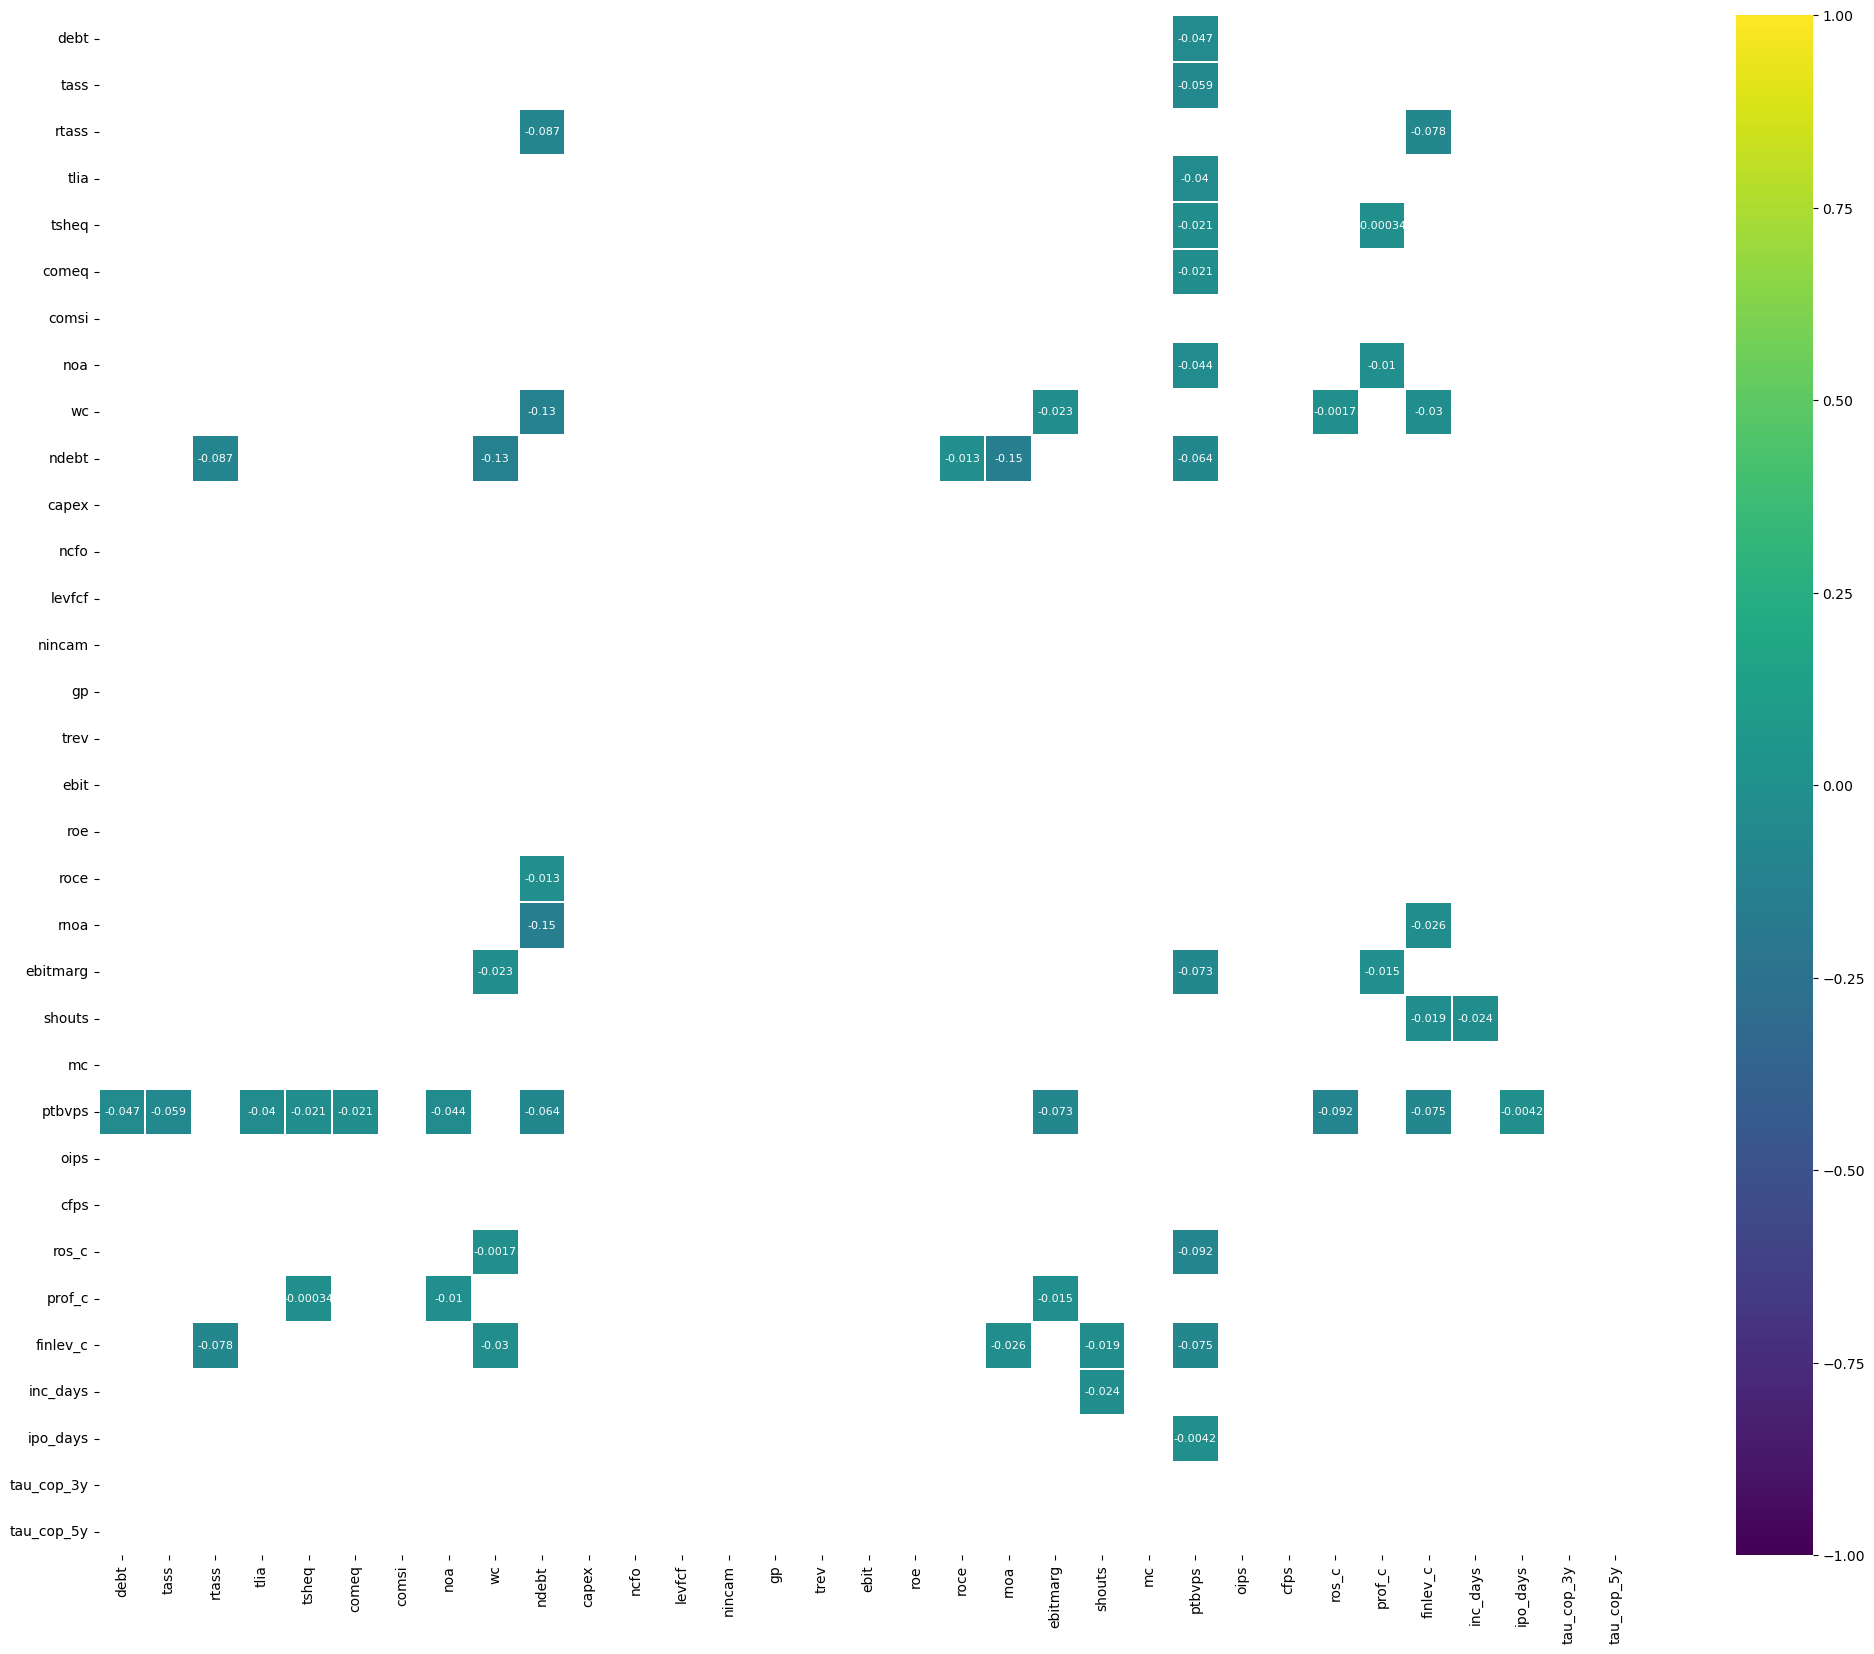

In [10]:
# negative correlations
f, ax = plt.subplots(figsize=(25, 20))

corr = data_set[var_num].drop('tau_target_hor', axis=1).corr()
sns.heatmap(corr[(corr <= 0)], cmap = 'viridis', vmax = 1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={'size':8}, square=True);

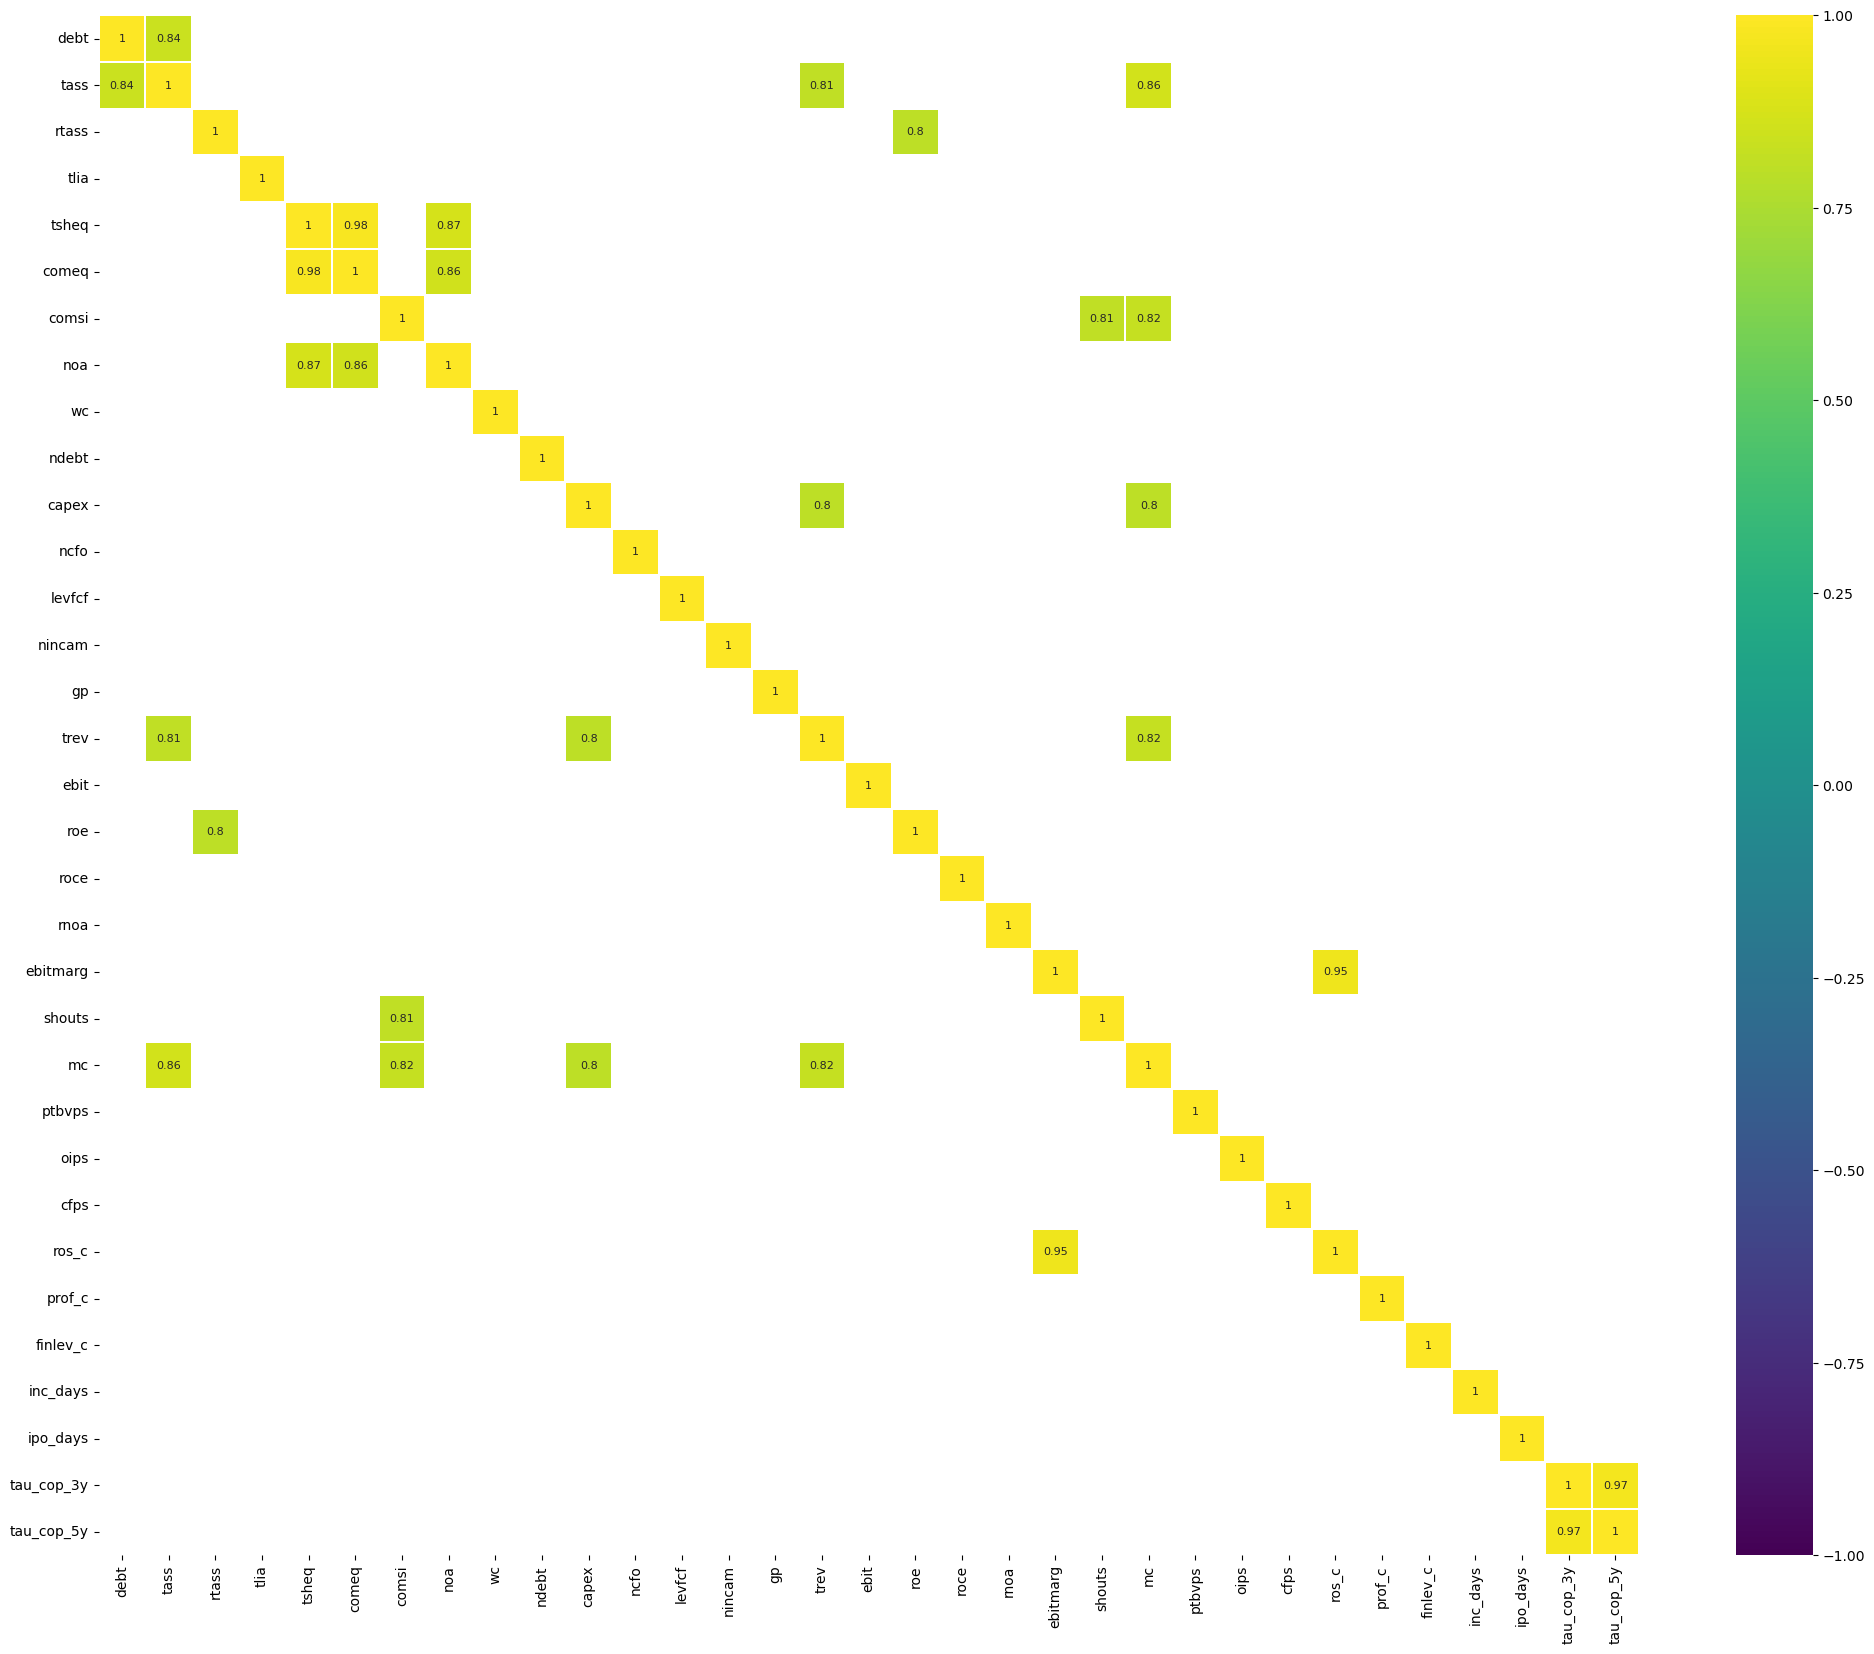

In [11]:
f, ax = plt.subplots(figsize=(25, 20))

corr = data_set[var_num].drop('tau_target_hor', axis=1).corr()
sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.8)], cmap = 'viridis', vmax = 1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={'size':8}, square=True);

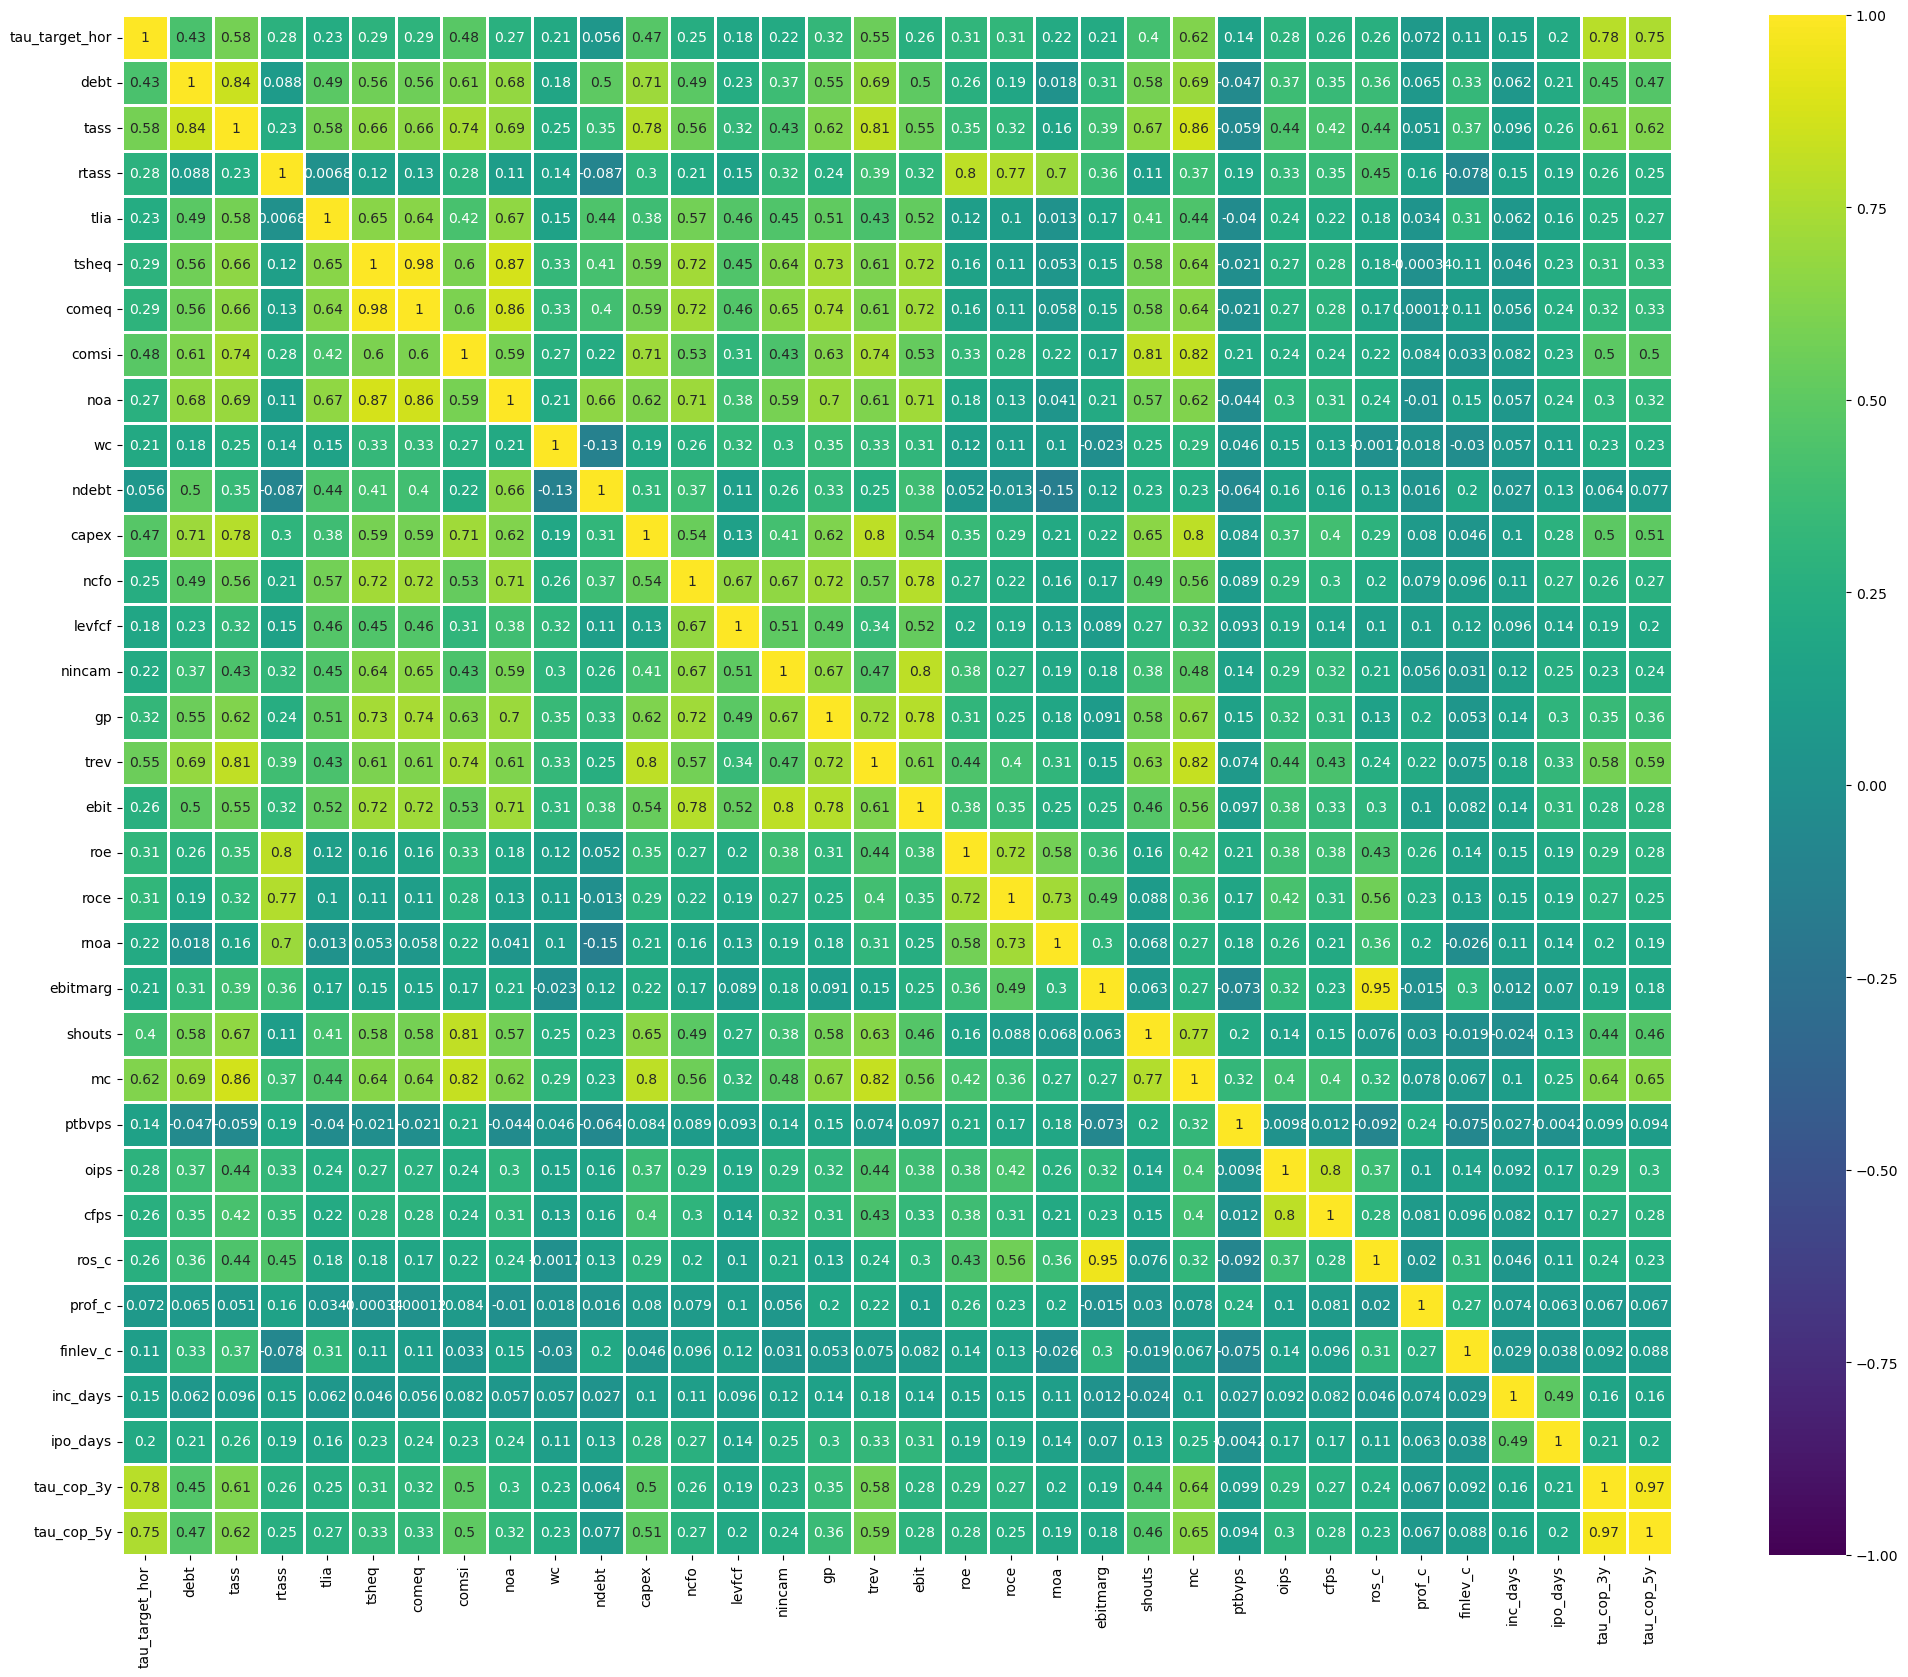

In [12]:
f, ax = plt.subplots(figsize=(25, 20))

sns.heatmap(data_set[var_num].corr(), center=0, linewidths=0.8, cmap='viridis',  vmax = 1.0, vmin=-1.0, annot=True);

## ----------------------------------------
## Variance Inflation Factor

In [13]:
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_vif = data_set.copy()

y = data_vif['tau_target_hor']

# select the independent variables
X = data_vif[[ 'tau_cop_3y',
       'tau_cop_5y', 'debt', 'tass', 'rtass', 'tlia', 'tsheq',
       'comeq', 'comsi', 'noa', 'wc', 'ndebt', 'capex', 'ncfo', 'levfcf',
       'nincam', 'gp', 'trev', 'ebit', 'roe', 'roce', 'rnoa', 'ebitmarg',
       'shouts', 'mc', 'ptbvps', 'oips', 'cfps', 'ros_c', 'prof_c', 'finlev_c',
       'inc_days', 'ipo_days']]

# fit a multiple linear regression model
model = OLS(y, X).fit()

#calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["vif_factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [14]:
print('Amount kept when no features are dropped: ' + str(len(vif)))
display(vif.round(2))

Amount kept when no features are dropped: 33


,vif_factor,features
0,70.34,tau_cop_3y
1,70.52,tau_cop_5y
2,4.90,debt
3,30.32,tass
4,5.26,rtass
5,2.49,tlia
6,34.46,tsheq
7,32.79,comeq
8,4.48,comsi
9,9.57,noa


In [15]:
display(vif[vif['vif_factor']>5].round(2))

features_to_drop_vif_5 = vif[vif['vif_factor']>5].features.drop(labels=[0,1])
print('amount dropped: ' + str(len(features_to_drop_vif_5)))
display(features_to_drop_vif_5)

,vif_factor,features
0,70.34,tau_cop_3y
1,70.52,tau_cop_5y
3,30.32,tass
4,5.26,rtass
6,34.46,tsheq
7,32.79,comeq
9,9.57,noa
17,7.27,trev
18,5.72,ebit
22,12.08,ebitmarg


amount dropped: 10


3         tass
4        rtass
6        tsheq
7        comeq
9          noa
17        trev
18        ebit
22    ebitmarg
24          mc
28       ros_c
Name: features, dtype: object

In [16]:
display(vif[vif['vif_factor']>10].round(2))

features_to_drop_vif_10 = vif[vif['vif_factor']>10].features.drop(labels=[0,1])
print('amount dropped: ' + str(len(features_to_drop_vif_10)))
display(features_to_drop_vif_10)

,vif_factor,features
0,70.34,tau_cop_3y
1,70.52,tau_cop_5y
3,30.32,tass
6,34.46,tsheq
7,32.79,comeq
22,12.08,ebitmarg
24,24.41,mc
28,14.18,ros_c


amount dropped: 6


3         tass
6        tsheq
7        comeq
22    ebitmarg
24          mc
28       ros_c
Name: features, dtype: object

### Dropping Features with VIF => 5

In [17]:
# to drop
data_set_vif_5 = data_set.copy()

for feature in features_to_drop_vif_5:
    data_set_vif_5 = data_set_vif_5.drop(columns=[feature])
    
data_set_vif_5.head()

,ric,year,symbol,tau_cop_3y,tau_cop_5y,rot_target_ori,tau_target_ori,par_target_ori,year_hor,tau_target_hor,rot_target_hor,par_target_hor,debt,tlia,comsi,wc,ndebt,capex,ncfo,levfcf,nincam,gp,roe,roce,rnoa,shouts,ptbvps,oips,cfps,prof_c,finlev_c,inc_days,ipo_days,naics_1,naics_2,naics_3,naics_4,naics_5,naics_6,naics_7,naics_8,naics_9,naics_10,naics_11,naics_12,naics_13,naics_14,naics_15,naics_16,naics_17,naics_18,naics_19,fam_target_hor_clayton,fam_target_hor_frank,fam_target_hor_gaussian,fam_target_hor_gumbel,fam_target_hor_indep,fam_target_hor_joe,fam_target_hor_student,fam_target_ori_clayton,fam_target_ori_frank,fam_target_ori_gaussian,fam_target_ori_gumbel,fam_target_ori_indep,fam_target_ori_joe,fam_target_ori_student,fam_target_hor,fam_target_ori
3,A.ITC,2004,A,0.485946,0.425203,0,0.462612,[[5.09499262]],2005,0.371968,0,[[3.78686423]],0.724119,0.034067,1.636099,2.209911,-3.080019,0.455358,0.377481,0.557085,0.373503,0.872499,-0.371659,-0.617933,-0.347687,1.750710,0.207180,-0.428181,-0.337362,-0.093411,-0.366484,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,frank,frank
4,A.ITC,2005,A,0.451243,0.457525,0,0.371968,[[3.78686423]],2006,0.384465,0,[[0.56787014]],-2.241748,-0.058830,1.675887,1.888018,-6.019859,0.675604,0.600123,0.767432,0.308105,0.972029,-0.222672,-0.369045,-0.020705,1.757078,0.404743,-0.353201,-0.305037,-0.126606,-0.492430,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,gaussian,frank
5,A.ITC,2006,A,0.396258,0.457678,0,0.384465,[[0.56787014]],2007,0.379842,180,[[1.61249331]],0.842004,0.048729,1.711115,1.810818,-2.022006,0.850563,0.342006,0.389434,4.636146,1.114784,1.909661,-0.148505,0.222685,1.626717,0.418459,-0.261741,0.276630,0.056585,-0.359963,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,gumbel,gaussian
6,A.ITC,2007,A,0.368536,0.425415,180,0.379842,[[1.61249331]],2008,0.573060,180,[[2.34224801]],0.994720,0.108090,1.734718,1.460667,-0.066225,0.762686,0.667285,0.818548,0.785464,1.261756,0.581183,-0.077263,0.151476,1.562732,0.575732,-0.193956,-0.061476,0.288953,-0.249367,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,gumbel,gumbel
7,A.ITC,2008,A,0.449823,0.429873,180,0.573060,[[2.34224801]],2009,0.557232,0,[[0.76773438]\n [2.88717691]],1.003267,0.120623,1.748967,1.327788,0.058889,0.762686,0.461669,0.570003,0.868561,1.366715,0.944631,0.183405,0.339715,1.524972,0.123389,-0.061202,0.012943,0.694797,-0.112826,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,student,gumbel


### Dropping Features with VIF => 10

In [18]:
# to drop
data_set_vif_10 = data_set.copy()

for feature in features_to_drop_vif_10:
    data_set_vif_10 = data_set_vif_10.drop(columns=[feature])

data_set_vif_10.head()

,ric,year,symbol,tau_cop_3y,tau_cop_5y,rot_target_ori,tau_target_ori,par_target_ori,year_hor,tau_target_hor,rot_target_hor,par_target_hor,debt,rtass,tlia,comsi,noa,wc,ndebt,capex,ncfo,levfcf,nincam,gp,trev,ebit,roe,roce,rnoa,shouts,ptbvps,oips,cfps,prof_c,finlev_c,inc_days,ipo_days,naics_1,naics_2,naics_3,naics_4,naics_5,naics_6,naics_7,naics_8,naics_9,naics_10,naics_11,naics_12,naics_13,naics_14,naics_15,naics_16,naics_17,naics_18,naics_19,fam_target_hor_clayton,fam_target_hor_frank,fam_target_hor_gaussian,fam_target_hor_gumbel,fam_target_hor_indep,fam_target_hor_joe,fam_target_hor_student,fam_target_ori_clayton,fam_target_ori_frank,fam_target_ori_gaussian,fam_target_ori_gumbel,fam_target_ori_indep,fam_target_ori_joe,fam_target_ori_student,fam_target_hor,fam_target_ori
3,A.ITC,2004,A,0.485946,0.425203,0,0.462612,[[5.09499262]],2005,0.371968,0,[[3.78686423]],0.724119,-0.322801,0.034067,1.636099,0.057001,2.209911,-3.080019,0.455358,0.377481,0.557085,0.373503,0.872499,1.050527,-0.209038,-0.371659,-0.617933,-0.347687,1.750710,0.207180,-0.428181,-0.337362,-0.093411,-0.366484,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,frank,frank
4,A.ITC,2005,A,0.451243,0.457525,0,0.371968,[[3.78686423]],2006,0.384465,0,[[0.56787014]],-2.241748,-0.125101,-0.058830,1.675887,-0.056930,1.888018,-6.019859,0.675604,0.600123,0.767432,0.308105,0.972029,1.067135,0.062047,-0.222672,-0.369045,-0.020705,1.757078,0.404743,-0.353201,-0.305037,-0.126606,-0.492430,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,gaussian,frank
5,A.ITC,2006,A,0.396258,0.457678,0,0.384465,[[0.56787014]],2007,0.379842,180,[[1.61249331]],0.842004,2.710760,0.048729,1.711115,0.149258,1.810818,-2.022006,0.850563,0.342006,0.389434,4.636146,1.114784,1.102818,0.277253,1.909661,-0.148505,0.222685,1.626717,0.418459,-0.261741,0.276630,0.056585,-0.359963,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,gumbel,gaussian
6,A.ITC,2007,A,0.368536,0.425415,180,0.379842,[[1.61249331]],2008,0.573060,180,[[2.34224801]],0.994720,0.661017,0.108090,1.734718,0.262343,1.460667,-0.066225,0.762686,0.667285,0.818548,0.785464,1.261756,1.154780,0.396193,0.581183,-0.077263,0.151476,1.562732,0.575732,-0.193956,-0.061476,0.288953,-0.249367,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,gumbel,gumbel
7,A.ITC,2008,A,0.449823,0.429873,180,0.573060,[[2.34224801]],2009,0.557232,0,[[0.76773438]\n [2.88717691]],1.003267,0.809965,0.120623,1.748967,0.218192,1.327788,0.058889,0.762686,0.461669,0.570003,0.868561,1.366715,1.193338,0.611192,0.944631,0.183405,0.339715,1.524972,0.123389,-0.061202,0.012943,0.694797,-0.112826,-0.319891,-0.37766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,student,gumbel


## ----------------------------------------
## Save Data

In [19]:
# all features kept
data_set.to_csv(path + 'data_artifacts' + slash + 'data_set_e_spx_3-all.csv')

# features vif < 5
data_set_vif_5.to_csv(path + 'data_artifacts' + slash + 'data_set_e_spx_3-vif_5.csv')

# features vif < 10
data_set_vif_10.to_csv(path + 'data_artifacts' + slash + 'data_set_e_spx_3-vif_10.csv')